In [2]:
import numpy as np
import matplotlib.pyplot as plt

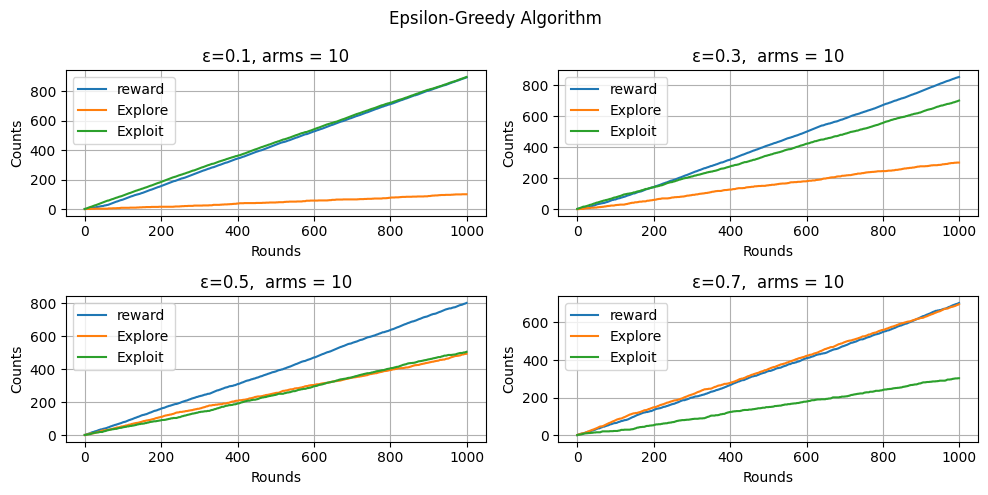

<Figure size 640x480 with 0 Axes>

In [19]:
np.random.seed(0)

# 環境設置
n_arms = 10
n_rounds = 1000
true_probs = np.random.rand(n_arms) #設置每個 arm 的真實成功概率

# 模擬拉手把動作
def pull(arm):
    return np.random.rand() < true_probs[arm] 

# Epsilon-Greedy
def epsilon_greedy(epsilon=0.1):
    Q = np.zeros(n_arms)  # 平均估計報酬
    N = np.zeros(n_arms)  # 每個臂被選的次數
    explore = []
    exploit = []
    explore_cnt = 0
    exploit_cnt = 0
    rewards = []

    for t in range(n_rounds):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n_arms)
            explore_cnt += 1
        else:
            arm = np.argmax(Q)
            exploit_cnt += 1
        reward = pull(arm)
        N[arm] += 1
        Q[arm] += (reward - Q[arm]) / N[arm]
        rewards.append(reward)
        explore.append(explore_cnt)
        exploit.append(exploit_cnt)

    return np.cumsum(rewards), explore, exploit

# 執行演算法並繪圖
cum_rewards, a, b = epsilon_greedy(epsilon=0.1)
cum_rewards2, a2, b2 = epsilon_greedy(epsilon=0.3)
cum_rewards3, a3, b3 = epsilon_greedy(epsilon=0.5)
cum_rewards4, a4, b4 = epsilon_greedy(epsilon=0.7)



fig, axes = plt.subplots(2, 2, figsize=(10, 5))
#plt.figure(figsize=(10, 5))
#plt.xlabel("Rounds")
#plt.ylabel("Counts")
axes[0, 0].set_title("ε=0.1, arms = 10")
axes[0, 0].plot(cum_rewards, label="reward")
axes[0, 0].plot(a, label="Explore")
axes[0, 0].plot(b, label="Exploit")
axes[0, 0].grid(True)
axes[0, 0].legend()
axes[0, 0].set_xlabel("Rounds")
axes[0, 0].set_ylabel("Counts")

axes[0, 1].set_title("ε=0.3,  arms = 10")
axes[0, 1].plot(cum_rewards2, label="reward")
axes[0, 1].plot(a2, label="Explore")
axes[0, 1].plot(b2, label="Exploit")
axes[0, 1].grid(True)
axes[0, 1].legend()
axes[0, 1].set_xlabel("Rounds")
axes[0, 1].set_ylabel("Counts")

axes[1, 0].set_title("ε=0.5,  arms = 10")
axes[1, 0].plot(cum_rewards3, label="reward")
axes[1, 0].plot(a3, label="Explore")
axes[1, 0].plot(b3, label="Exploit")
axes[1, 0].grid(True)
axes[1, 0].legend()
axes[1, 0].set_xlabel("Rounds")
axes[1, 0].set_ylabel("Counts")


axes[1, 1].set_title("ε=0.7,  arms = 10")
axes[1, 1].plot(cum_rewards4, label="reward")
axes[1, 1].plot(a4, label="Explore")
axes[1, 1].plot(b4, label="Exploit")
axes[1, 1].grid(True)
axes[1, 1].legend()
axes[1, 1].set_xlabel("Rounds")
axes[1, 1].set_ylabel("Counts")



plt.suptitle("Epsilon-Greedy Algorithm")
plt.tight_layout()
plt.show()
plt.savefig("epsilon_greedy.png")

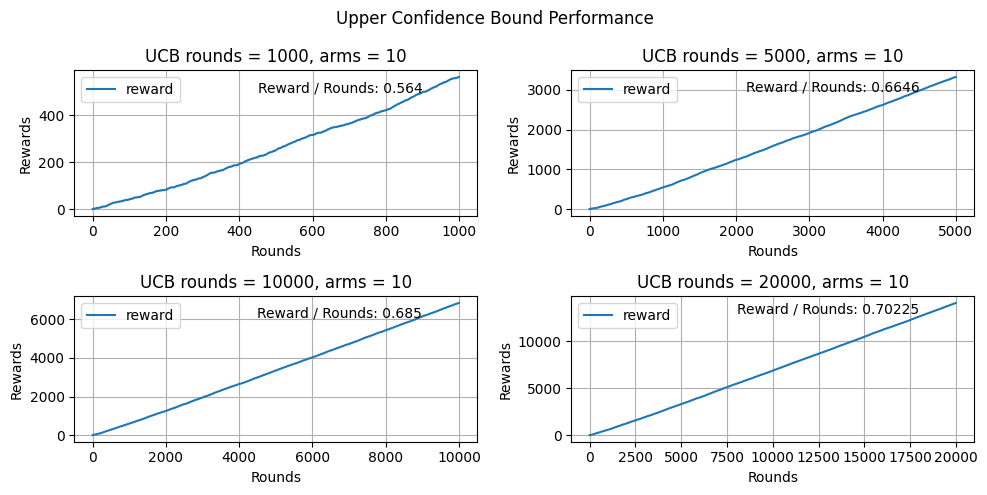

In [59]:

np.random.seed(1)

# 環境參數
n_arms = 10
true_probs = np.random.rand(n_arms)

def pull(arm):
    return np.random.rand() < true_probs[arm]

def ucb(n_arms = 10, n_rounds = 1000):
    Q = np.zeros(n_arms)  # 平均報酬
    N = np.zeros(n_arms)  # 次數
    rewards = []

    for t in range(1, n_rounds + 1):
        if 0 in N:
            arm = np.argmin(N)  # 強制每臂至少被試一次
        else:
            ucb_values = Q + np.sqrt((2 * np.log(t)) / N)
            arm = np.argmax(ucb_values)

        reward = pull(arm)
        N[arm] += 1
        Q[arm] += (reward - Q[arm]) / N[arm]
        rewards.append(reward)

    return np.cumsum(rewards)

# 執行 UCB 並畫圖

cum_rewards1 = ucb(n_rounds=1000)
cum_rewards2 = ucb(n_rounds=5000)
cum_rewards3 = ucb(n_rounds=10000)
cum_rewards4 = ucb(n_rounds=20000)

#plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(2, 2, figsize=(10, 5))


ax[0, 0].plot(cum_rewards1, label="reward")
ax[0, 0].set_title("UCB rounds = 1000, arms = 10")
ax[0, 0].grid(True)
ax[0, 0].legend()
ax[0, 0].set_xlabel("Rounds")
ax[0, 0].set_ylabel("Rewards")
ax[0, 0].text(900, cum_rewards1[-1] - 80, "Reward / Rounds: " + str(cum_rewards1[-1] / 1000), fontsize=10, ha='right', va='bottom')


ax[0, 1].plot(cum_rewards2, label="reward")
ax[0, 1].set_title("UCB rounds = 5000, arms = 10")
ax[0, 1].grid(True)
ax[0, 1].legend()
ax[0, 1].set_xlabel("Rounds")
ax[0, 1].set_ylabel("Rewards")
ax[0, 1].text(4500, cum_rewards2[-1] - 450, "Reward / Rounds: " + str(cum_rewards2[-1] / 5000), fontsize=10, ha='right', va='bottom')

ax[1, 0].plot(cum_rewards3, label="reward")
ax[1, 0].set_title("UCB rounds = 10000, arms = 10")
ax[1, 0].grid(True)
ax[1, 0].legend()
ax[1, 0].set_xlabel("Rounds")
ax[1, 0].set_ylabel("Rewards")
ax[1, 0].text(9000, cum_rewards3[-1] - 900, "Reward / Rounds: " + str(cum_rewards3[-1] / 10000), fontsize=10, ha='right', va='bottom')

ax[1, 1].plot(cum_rewards4, label="reward")
ax[1, 1].set_title("UCB rounds = 20000, arms = 10")
ax[1, 1].grid(True)
ax[1, 1].legend()
ax[1, 1].set_xlabel("Rounds")
ax[1, 1].set_ylabel("Rewards")
ax[1, 1].text(18000, cum_rewards4[-1] - 1400, "Reward / Rounds: " + str(cum_rewards4[-1] / 20000), fontsize=10, ha='right', va='bottom')

plt.suptitle("Upper Confidence Bound Performance")
plt.tight_layout()
plt.show()



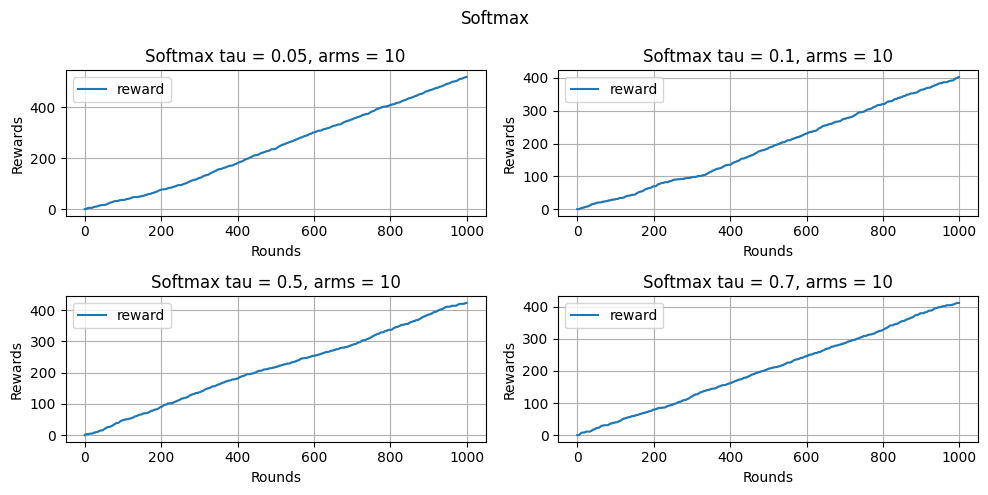

In [70]:
np.random.seed(2)

# 環境設置
n_arms = 10
n_rounds = 1000
true_probs = np.random.rand(n_arms)

def pull(arm):
    return np.random.rand() < true_probs[arm]

def softmax(tau=0.1):
    Q = np.zeros(n_arms)  # 平均估計報酬
    N = np.zeros(n_arms)  # 次數
    rewards = []

    for t in range(n_rounds):
        exp_Q = np.exp(Q / tau)
        probs = exp_Q / np.sum(exp_Q)
        arm = np.random.choice(np.arange(n_arms), p=probs)
        reward = pull(arm)
        N[arm] += 1
        Q[arm] += (reward - Q[arm]) / N[arm]
        rewards.append(reward)

    return np.cumsum(rewards)

# 執行演算法並繪圖
cum_rewards1 = softmax(tau=0.05)
cum_rewards2 = softmax(tau=0.1)
cum_rewards3 = softmax(tau=0.5)
cum_rewards4 = softmax(tau=0.7)


fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(cum_rewards1, label="reward")
ax[0, 0].set_title("Softmax tau = 0.05, arms = 10")
ax[0, 0].grid(True)
ax[0, 0].legend()
ax[0, 0].set_xlabel("Rounds")
ax[0, 0].set_ylabel("Rewards")

ax[0, 1].plot(cum_rewards2, label="reward")
ax[0, 1].set_title("Softmax tau = 0.1, arms = 10")
ax[0, 1].grid(True)
ax[0, 1].legend()
ax[0, 1].set_xlabel("Rounds")
ax[0, 1].set_ylabel("Rewards")

ax[1, 0].plot(cum_rewards3, label="reward")
ax[1, 0].set_title("Softmax tau = 0.5, arms = 10")
ax[1, 0].grid(True)
ax[1, 0].legend()
ax[1, 0].set_xlabel("Rounds")
ax[1, 0].set_ylabel("Rewards")


ax[1, 1].plot(cum_rewards4, label="reward")
ax[1, 1].set_title("Softmax tau = 0.7, arms = 10")
ax[1, 1].grid(True)
ax[1, 1].legend()
ax[1, 1].set_xlabel("Rounds")
ax[1, 1].set_ylabel("Rewards")



plt.suptitle("Softmax")
plt.tight_layout()
plt.show()

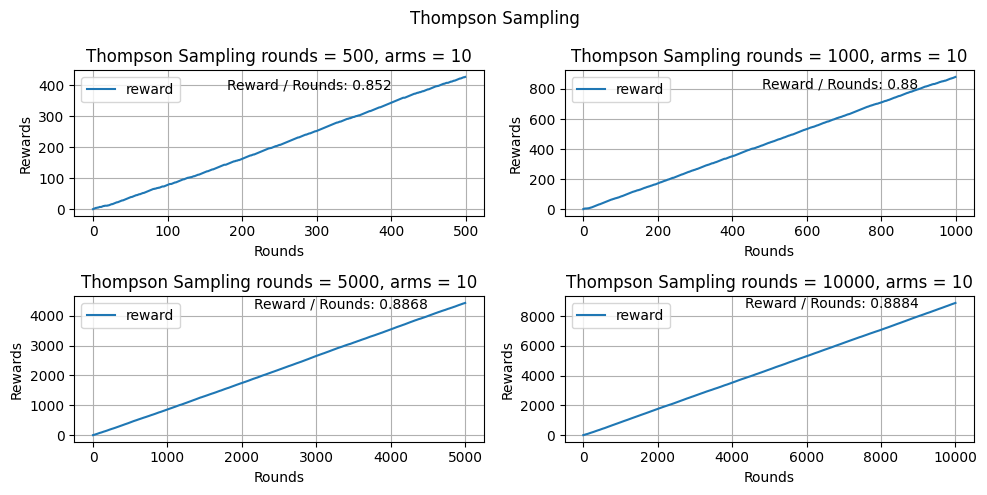

In [68]:

np.random.seed(3)

# 環境設置
n_arms = 10

true_probs = np.random.rand(n_arms)

def pull(arm):
    return np.random.rand() < true_probs[arm]

def thompson_sampling(n_rounds=1000):
    alpha = np.ones(n_arms)
    beta = np.ones(n_arms)
    rewards = []

    for _ in range(n_rounds):
        samples = np.random.beta(alpha, beta)
        arm = np.argmax(samples)
        reward = pull(arm)
        if reward:
            alpha[arm] += 1
        else:
            beta[arm] += 1
        rewards.append(reward)

    return np.cumsum(rewards)

# 執行演算法並畫圖
cum_rewards1 = thompson_sampling(500)
cum_rewards2 = thompson_sampling(1000)
cum_rewards3 = thompson_sampling(5000)
cum_rewards4 = thompson_sampling(10000)

fig, ax = plt.subplots(2, 2, figsize=(10, 5))

ax[0, 0].plot(cum_rewards1, label="reward")
ax[0, 0].set_title("Thompson Sampling rounds = 500, arms = 10")
ax[0, 0].grid(True)
ax[0, 0].legend()
ax[0, 0].set_xlabel("Rounds")
ax[0, 0].set_ylabel("Rewards")
ax[0, 0].text(400, cum_rewards1[-1] - 50, "Reward / Rounds: " + str(cum_rewards1[-1] / 500), fontsize=10, ha='right', va='bottom')

ax[0, 1].plot(cum_rewards2, label="reward")
ax[0, 1].set_title("Thompson Sampling rounds = 1000, arms = 10")
ax[0, 1].grid(True)
ax[0, 1].legend()
ax[0, 1].set_xlabel("Rounds")
ax[0, 1].set_ylabel("Rewards")
ax[0, 1].text(900, cum_rewards2[-1] - 100, "Reward / Rounds: " + str(cum_rewards2[-1] / 1000), fontsize=10, ha='right', va='bottom')

ax[1, 0].plot(cum_rewards3, label="reward")
ax[1, 0].set_title("Thompson Sampling rounds = 5000, arms = 10")
ax[1, 0].grid(True)
ax[1, 0].legend()
ax[1, 0].set_xlabel("Rounds")
ax[1, 0].set_ylabel("Rewards")
ax[1, 0].text(4500, cum_rewards3[-1] - 300, "Reward / Rounds: " + str(cum_rewards3[-1] / 5000), fontsize=10, ha='right', va='bottom')

ax[1, 1].plot(cum_rewards4, label="reward")
ax[1, 1].set_title("Thompson Sampling rounds = 10000, arms = 10")
ax[1, 1].grid(True)
ax[1, 1].legend()
ax[1, 1].set_xlabel("Rounds")
ax[1, 1].set_ylabel("Rewards")
ax[1, 1].text(9000, cum_rewards4[-1] - 500, "Reward / Rounds: " + str(cum_rewards4[-1] / 10000), fontsize=10, ha='right', va='bottom')

plt.suptitle("Thompson Sampling")
plt.tight_layout()
plt.show()


In [ ]:

ranking = [0, 0, 0, 0]

for i in range(1000):
    np.random.seed(i)
    epsilon_greedy_rewards, explore_arr, exploit_arr = epsilon_greedy(epsilon=0.1)
    ucb_rewards = ucb(n_rounds=1000)
    softmax_rewards = softmax(tau=0.1)
    thompson_rewards = thompson_sampling(1000)

    rewards = [
        epsilon_greedy_rewards[-1], 
        ucb_rewards[-1], 
        softmax_rewards[-1], 
        thompson_rewards[-1]
    ]
    labels = [
        "Epsilon-Greedy (ε=0.1)", 
        "UCB", 
        "Softmax (τ=0.1)", 
        "Thompson Sampling"
    ]   
    winner = np.argmax(rewards)
    ranking[winner] += 1

final_winner = np.argmax(rewards)
best_algorithm = labels[final_winner]

print("Ranking of algorithms over 1000 trials:", ranking)
print("Best algorithm:", best_algorithm)


NameError: name 'np' is not defined